In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import seaborn as sns

from pathlib import Path
from sbibm.utils.io import get_tensor_from_csv

## validation loss

In [3]:
root = Path("/home/ben/sci/cnre/infinite/")
experiment_folders = {
    "slcp": root / "outputs/2022-04-18/17-17-25",
    "two_moons": root / "outputs/2022-04-18/18-04-06",
    "gaussian_mixture": root / "outputs/2022-04-18/18-11-35",
    "gaussian_linear_uniform": root / "outputs/2022-04-18/18-24-56",
    # "slcp-big": root / "multirun/2022-04-19/10-20-49/2",
    # "two_moons-big": root / "multirun/2022-04-19/10-20-49/0",
    # "gaussian_mixture-big": root / "multirun/2022-04-19/10-20-49/1",
    # "gaussian_linear_uniform-big": root / "multirun/2022-04-19/10-20-49/3",
}
filename = "validation_loss.csv.bz2"

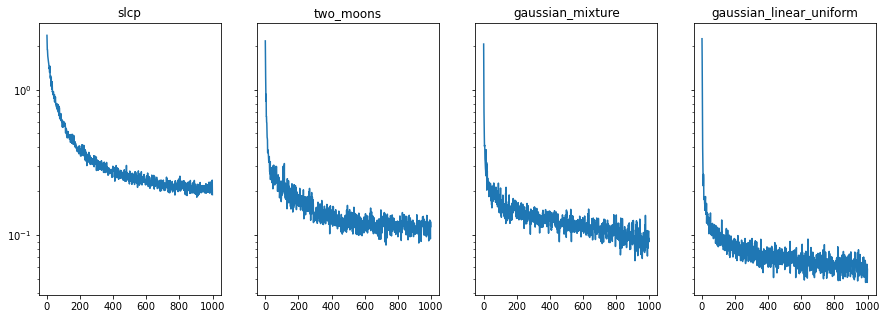

In [36]:
fig, axes = plt.subplots(ncols=len(experiment_folders), sharey="row", figsize=(15,5))
for ax, (name, experiment_folder) in zip(axes.flatten(), experiment_folders.items()):
    validation_loss = get_tensor_from_csv(experiment_folder / filename)
    ax.semilogy(validation_loss)
    # ax.loglog(validation_loss)
    ax.set_title(name)

## metrics csv

`/home/ben/sci/cnre/infinite/multirun/2022-04-22/12-33-04` "big", CNRE `slcp` & `gaussian_mixture`, reuse=True  
`/home/ben/sci/cnre/infinite/multirun/2022-04-28/11-48-27` "big", CNRE `two_moons`, reuse=True  
`/home/ben/sci/cnre/infinite/multirun/2022-04-28/21-08-52` "big", NRE, `slcp` & `gaussian_mixture` & `two_moons`, reuse=True  


`/home/ben/sci/cnre/infinite/multirun/2022-04-29/*` two "big" runs, CNRE, `gaussian_mixture`, reuse=True  

`/home/ben/sci/cnre/infinite/multirun/2022-04-30/17-32-15/` CNRE, `slcp`, `two_moons`, `gaussian_mixture`, reuse=False, 200 atoms  


This one is the first cheap prior runs:  
2022-05-02

In [106]:
files = [
    # "metrics01.csv", 
    # "metrics02.csv", 
    # "metrics-512.csv", 
    # "metrics-512b.csv", 
    # "metrics-reuse-false.csv",
    "metrics-3layer-reuse-false.csv",
    "metrics-2layer-reuse-false.csv", 
]
df = pd.concat([pd.read_csv(file, index_col=0) for file in files], ignore_index=True)
print(len(df))
print(df.columns)
print(df["algorithm"].unique())
df.head()

611
Index(['task', 'seed', 'algorithm', 'num_atoms', 'gamma', 'extra_theta_factor',
       'hidden_features', 'num_blocks', 'AVG_LOG_RATIO', 'RT', 'C2ST_Z-01',
       'MMD-01', 'MEDDIST-01', 'NLTP-01', 'C2ST_Z-02', 'MMD-02', 'MEDDIST-02',
       'NLTP-02', 'C2ST_Z-03', 'MMD-03', 'MEDDIST-03', 'NLTP-03', 'C2ST_Z-04',
       'MMD-04', 'MEDDIST-04', 'NLTP-04', 'C2ST_Z-05', 'MMD-05', 'MEDDIST-05',
       'NLTP-05', 'C2ST_Z-06', 'MMD-06', 'MEDDIST-06', 'NLTP-06', 'C2ST_Z-07',
       'MMD-07', 'MEDDIST-07', 'NLTP-07', 'C2ST_Z-08', 'MMD-08', 'MEDDIST-08',
       'NLTP-08', 'C2ST_Z-09', 'MMD-09', 'MEDDIST-09', 'NLTP-09', 'C2ST_Z-10',
       'MMD-10', 'MEDDIST-10', 'NLTP-10', 'NLTP', 'num_simulations_simulator',
       'path', 'folder', 'reuse'],
      dtype='object')
['NRE-B' 'CNRE']


,task,seed,algorithm,num_atoms,gamma,extra_theta_factor,hidden_features,num_blocks,AVG_LOG_RATIO,RT,...,NLTP-09,C2ST_Z-10,MMD-10,MEDDIST-10,NLTP-10,NLTP,num_simulations_simulator,path,folder,reuse
0,slcp,841571673,NRE-B,200,NaN,False,128,3,-18.550940,17.729732,...,NaN,0.65160,0.014563,2.202498,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/3layer-reuse-false...,15,NaN
1,two_moons,2663447715,NRE-B,100,NaN,False,128,3,-16.927990,7.017098,...,NaN,0.57445,0.002355,0.091590,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/3layer-reuse-false...,5,NaN
2,gaussian_mixture,592123636,NRE-B,150,NaN,False,128,3,12.151186,10.375323,...,NaN,0.71425,0.024768,0.615719,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/3layer-reuse-false...,22,NaN
3,slcp,1150370424,NRE-B,10,NaN,False,128,3,-146.607360,7.579467,...,NaN,0.72065,0.015328,2.287202,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/3layer-reuse-false...,9,NaN
4,slcp,3511068961,NRE-B,25,NaN,False,128,3,-83.167206,9.589066,...,NaN,0.69815,0.029425,2.162085,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/3layer-reuse-false...,10,NaN


In [107]:
# groupby drops NaNs fix this here.
df["gamma"] = df["gamma"].fillna(1.0)

df_wide = pd.wide_to_long(
    df, 
    ["C2ST_Z"], 
    i=["task", "algorithm", "num_atoms", "gamma", "num_blocks", "hidden_features", "seed"], 
    j="num_observation", 
    sep="-"
)

# groupby drops NaNs
df_wide.groupby([
    "task",
    "algorithm",
    "num_atoms",
    "gamma",
    "num_blocks",
    "hidden_features",
]).aggregate({
    "C2ST_Z": ["mean", "std"],
})

C2ST_Z  \
                                                                           mean   
task             algorithm num_atoms gamma num_blocks hidden_features             
gaussian_mixture CNRE      2         0.01  2          50               0.731457   
                                           3          128              0.771282   
                                     0.10  2          50               0.721917   
                                           3          128              0.750598   
                                     1.00  2          50               0.755053   
...                                                                         ...   
two_moons        NRE-B     100       1.00  3          128              0.544480   
                           150       1.00  2          50               0.553836   
                                           3          128              0.555863   
                           200       1.00  2          50               0.553001   
                                           3          128              0.554725   

                                                                                 
                                                                            std  
task             algorithm num_atoms gamma num_blocks hidden_features            
gaussian_mixture CNRE      2         0.01  2          50               0.025846  
                                           3          128              0.015310  
                                     0.10  2          50               0.028781  
                                           3          128              0.018017  
                                     1.00  2          50               0.025907  
...                                                                         ...  
two_moons        NRE-B     100       1.00  3          128              0.035348  
                           150       1.00  2          50               0.035950  
                                           3          128              0.035432  
                           200       1.00  2          50               0.029828  
                                           3          128              0.035978  

[284 rows x 2 columns]

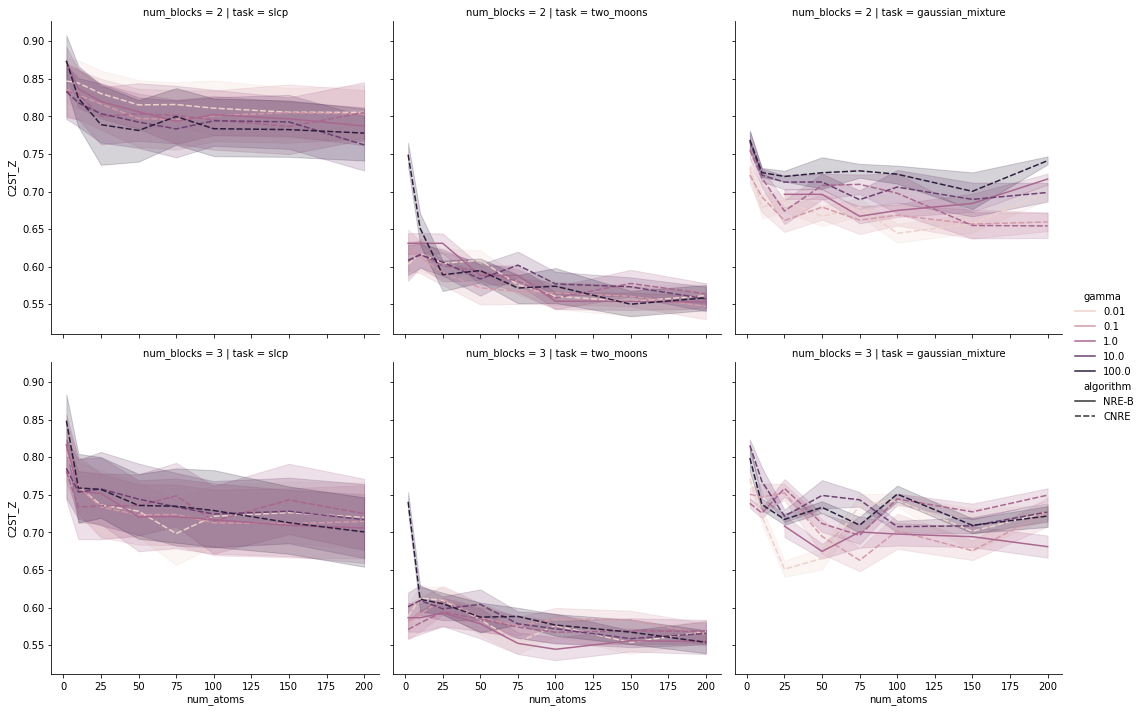

In [108]:
sns.relplot(
    data=df_wide,
    x="num_atoms",
    y="C2ST_Z",
    hue="gamma",
    style="algorithm",
    col="task",
    row="num_blocks",
    kind="line",
    hue_norm=LogNorm(),
)

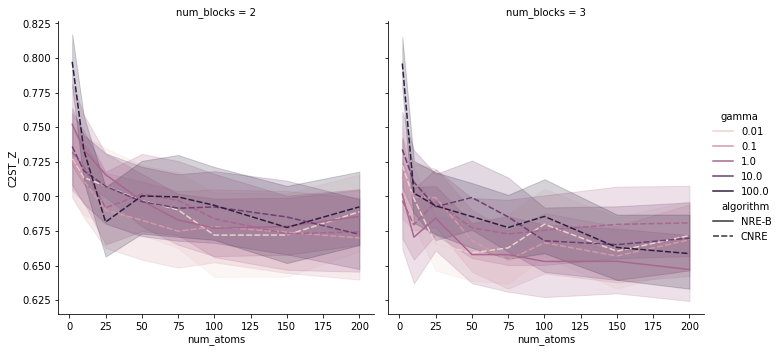

In [110]:
sns.relplot(
    data=df_wide,
    x="num_atoms",
    y="C2ST_Z",
    hue="gamma",
    style="algorithm",
    # col="task",
    col="num_blocks",
    kind="line",
    hue_norm=LogNorm(),
)